In [15]:
import pandas as pd
import datetime
import numpy as np
import warnings

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus'] = False  # 负号
path = "D:/program/program1/User_portrait/"

In [6]:
data_company = pd.read_csv(path + "20190301.csv", names = ['order_date', 'company', 'total_freight'])
data_company = data_company[data_company['total_freight'] >= 1]
data_company['order_date'] = pd.to_datetime(data_company['order_date'], format = '%Y-%m-%d')

In [7]:
data_company.head()

,order_date,company,total_freight
0,2018-10-30,乐清台诠机械,700.0
1,2019-01-08,深圳江先生（坑梓）,482.0
2,2018-11-25,昆山萌成,383.5
3,2018-10-12,深圳德信安,965.0
4,2018-10-25,广州维每力,533.0


In [8]:
data_company['data_diff'] = pd.to_datetime('today') - data_company['order_date']
data_company['data_diff'] = data_company['data_diff'].dt.days

In [9]:
R_data = data_company.groupby(by = 'company')['data_diff'].agg({'recency' : np.min})
F_data = data_company.groupby(by = 'company')['order_date'].agg({'frequency':np.size})
M_data = data_company.groupby(by = 'company')['total_freight'].agg({'monetary':np.sum})

In [10]:
R_data.head()

,recency
company,
01个人刘健,68
3M苏州,85
66号定制家居,46
Dotwil点为商城,37
IT中心测试,45


In [6]:
rfm_data = pd.concat([R_data, F_data, M_data], axis = 1)

In [7]:
rfm_data.dropna(axis = 0, inplace = True)

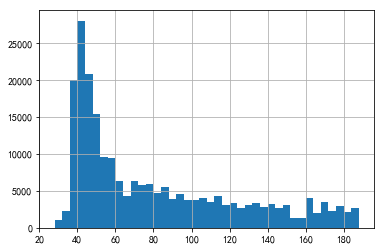

In [9]:
rfm_data['recency'].hist(bins = 40)

### 与RFM均值比较

In [8]:
rfm_data['R_label'] = 0
rfm_data['F_label'] = 0
rfm_data['M_label'] = 0
rfm_data.loc[rfm_data['recency'] < rfm_data['recency'].mean(), ['R_label']] = 1
rfm_data.loc[rfm_data['frequency'] > rfm_data['frequency'].mean(), ['F_label']] = 1
rfm_data.loc[rfm_data['monetary'] > rfm_data['monetary'].mean(), ['M_label']] = 1

In [9]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label
company,,,,,,
01个人刘健,67,2,669.00,1,0,0
3M苏州,84,8,4452.50,0,0,0
66号定制家居,45,6,12928.60,1,0,0
Dotwil点为商城,36,4,635.79,1,0,0
IT中心测试,44,3,217.00,1,0,0


### 与RFM得分均值比较

In [10]:
# def create_label(data, n, mark):
#     bins = data.quantile(q = np.linspace(0,1,n), interpolation = 'nearest')
#     bins[0] = 0
#     if mark == 1:
#         labels = [5, 4, 3, 2, 1]
#     elif mark == 2:
#         labels = [1, 2, 3, 4, 5]
#     else:
#         labels = [1, 2, 3, 4, 5, 6, 7, 8]
#     label = pd.cut(data, bins = bins, labels = labels)
#     return label

In [11]:
# R_S = create_label(rfm_data['recency'], 6, 1)
# F_S = create_label(rfm_data['frequency'], 6, 2)
# M_S = create_label(rfm_data['monetary'], 6, 2)

In [12]:
# rfm_data['R_S'] = R_S
# rfm_data['F_S'] = F_S
# rfm_data['M_S'] = M_S

In [13]:
# rfm_data = rfm_data.assign(R_label = rfm_data['R_S'].map(lambda x : 1 if x > rfm_data['R_S'].astype(int).mean() else 0),
#                            F_label = rfm_data['F_S'].map(lambda x : 1 if x > rfm_data['F_S'].astype(int).mean() else 0),
#                            M_label = rfm_data['M_S'].map(lambda x : 1 if x > rfm_data['M_S'].astype(int).mean() else 0))

In [10]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label
company,,,,,,
01个人刘健,67,2,669.00,1,0,0
3M苏州,84,8,4452.50,0,0,0
66号定制家居,45,6,12928.60,1,0,0
Dotwil点为商城,36,4,635.79,1,0,0
IT中心测试,44,3,217.00,1,0,0


In [11]:
rfm_data['rfm'] = rfm_data['R_label'].map(str) + rfm_data['F_label'].map(str) + rfm_data['M_label'].map(str)

In [12]:
rfm_data['custom'] = np.NaN
rfm_data.loc[rfm_data['rfm'] == '111', ['custom']] = '重要价值客户'
rfm_data.loc[rfm_data['rfm'] == '011', ['custom']] = '重要保持客户'
rfm_data.loc[rfm_data['rfm'] == '101', ['custom']] = '重要发展客户'
rfm_data.loc[rfm_data['rfm'] == '001', ['custom']] = '重要挽留客户'
rfm_data.loc[rfm_data['rfm'] == '110', ['custom']] = '一般价值客户'
rfm_data.loc[rfm_data['rfm'] == '100', ['custom']] = '一般发展客户'
rfm_data.loc[rfm_data['rfm'] == '010', ['custom']] = '一般保持客户'
rfm_data.loc[rfm_data['rfm'] == '000', ['custom']] = '一般挽留客户'

In [13]:
rfm_data['recency'].mean()

79.38811012031266

In [15]:
rfm_data[rfm_data['custom'] == '一般发展客户'].sort_values('recency').head(10)

,recency,frequency,monetary,R_label,F_label,M_label,rfm,custom
company,,,,,,,,
广州米思阳（服饰）,27,4,9010.6,1,0,0,100,一般发展客户
昆山茂利,27,8,993.5,1,0,0,100,一般发展客户
宁波维科新能源,27,3,3410.5,1,0,0,100,一般发展客户
杭州凡兔（萧山）,27,3,13931.0,1,0,0,100,一般发展客户
广州卡倍力,27,9,2896.0,1,0,0,100,一般发展客户
北京小象时光,27,3,700.0,1,0,0,100,一般发展客户
东莞兰亭,28,1,112.0,1,0,0,100,一般发展客户
昆明邮先送,28,3,2780.8,1,0,0,100,一般发展客户
深圳伏尔甘,28,1,200.0,1,0,0,100,一般发展客户


In [17]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label,rfm,custom
company,,,,,,,,
01个人刘健,67,2,669.00,1,0,0,100,一般发展客户
3M苏州,84,8,4452.50,0,0,0,000,一般挽留客户
66号定制家居,45,6,12928.60,1,0,0,100,一般发展客户
Dotwil点为商城,36,4,635.79,1,0,0,100,一般发展客户
IT中心测试,44,3,217.00,1,0,0,100,一般发展客户


In [18]:
rfm_c1 = list(rfm_data['custom'].value_counts().sort_index()) # 统计每个类别个数
rfm_c2 = list(rfm_data['custom'].value_counts().sort_index()/len(rfm_data)*100)
rfm_c3 = list(map(lambda x: round(x, 2), rfm_c2))
# 每个类别金额占比
rfm_sum = rfm_data['monetary'].groupby(rfm_data['custom']).sum()
rfm_percent = rfm_sum/rfm_data['monetary'].sum() * 100
rfm_c4 = rfm_percent.map(lambda x : round(x, 2))

rfm_c = pd.DataFrame({'数量': rfm_c1, '客户类型占比(%)': rfm_c3, '运费占比(%)' : rfm_c4})
rfm_c

,数量,客户类型占比(%),运费占比(%)
custom,,,
一般价值客户,23292,10.42,4.81
一般保持客户,1178,0.53,0.19
一般发展客户,86166,38.55,5.15
一般挽留客户,84417,37.77,2.48
重要价值客户,26018,11.64,84.54
重要保持客户,516,0.23,1.16
重要发展客户,1483,0.66,1.21
重要挽留客户,431,0.19,0.46


Text(0.5,1,'客户类型占比(%)')

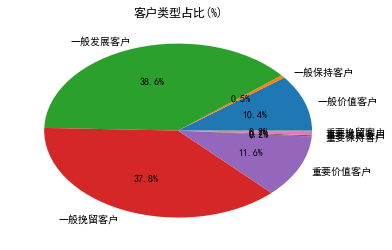

In [29]:
plt.pie(rfm_c['客户类型占比(%)'], labels = rfm_c.index, autopct = '%1.1f%%')
plt.title('客户类型占比(%)')

Text(0.5,1,'运费占比(%)')

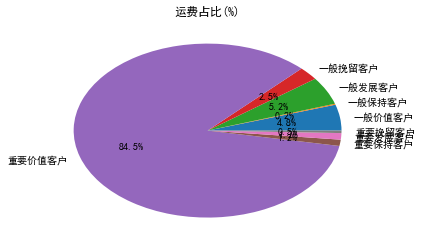

In [30]:
plt.pie(rfm_c['运费占比(%)'], labels = rfm_c.index, autopct = '%1.1f%%')
plt.title('运费占比(%)')